In [343]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [344]:
df = pd.read_csv('diabetes.csv')

## Als erstes die Daten entdecken

### Es handelt sich hierbei um den berühmten "pima" Datensatz von Kaggle, welcher medizinische Daten beinhaltet. Die binäre Variable beschreibt hier, ob eine Person an Diabetis erkrankt ist oder nicht. 

#### Beschreibung des Datensatzes: "The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.". 

#### Die Erkundung der Daten dient hier hauptsächlich dazu ein Gefühl für die Daten zu erhalten, um nachher die Features anzupassen.

Die Diabetes Pedigree Funktion gibt einen Score aufgrund der Wahrscheinlichkeit an Diabetis zu erkranken, basierend auf der Familienhistorie. Alle anderen Werte sollten selbsterklärend sein.

In [345]:
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [346]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [347]:
df.max() #Zeigt die maximalen Werte an, hier sind keine Auffäligkeiten die eventuell angepasst werden könnten.

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

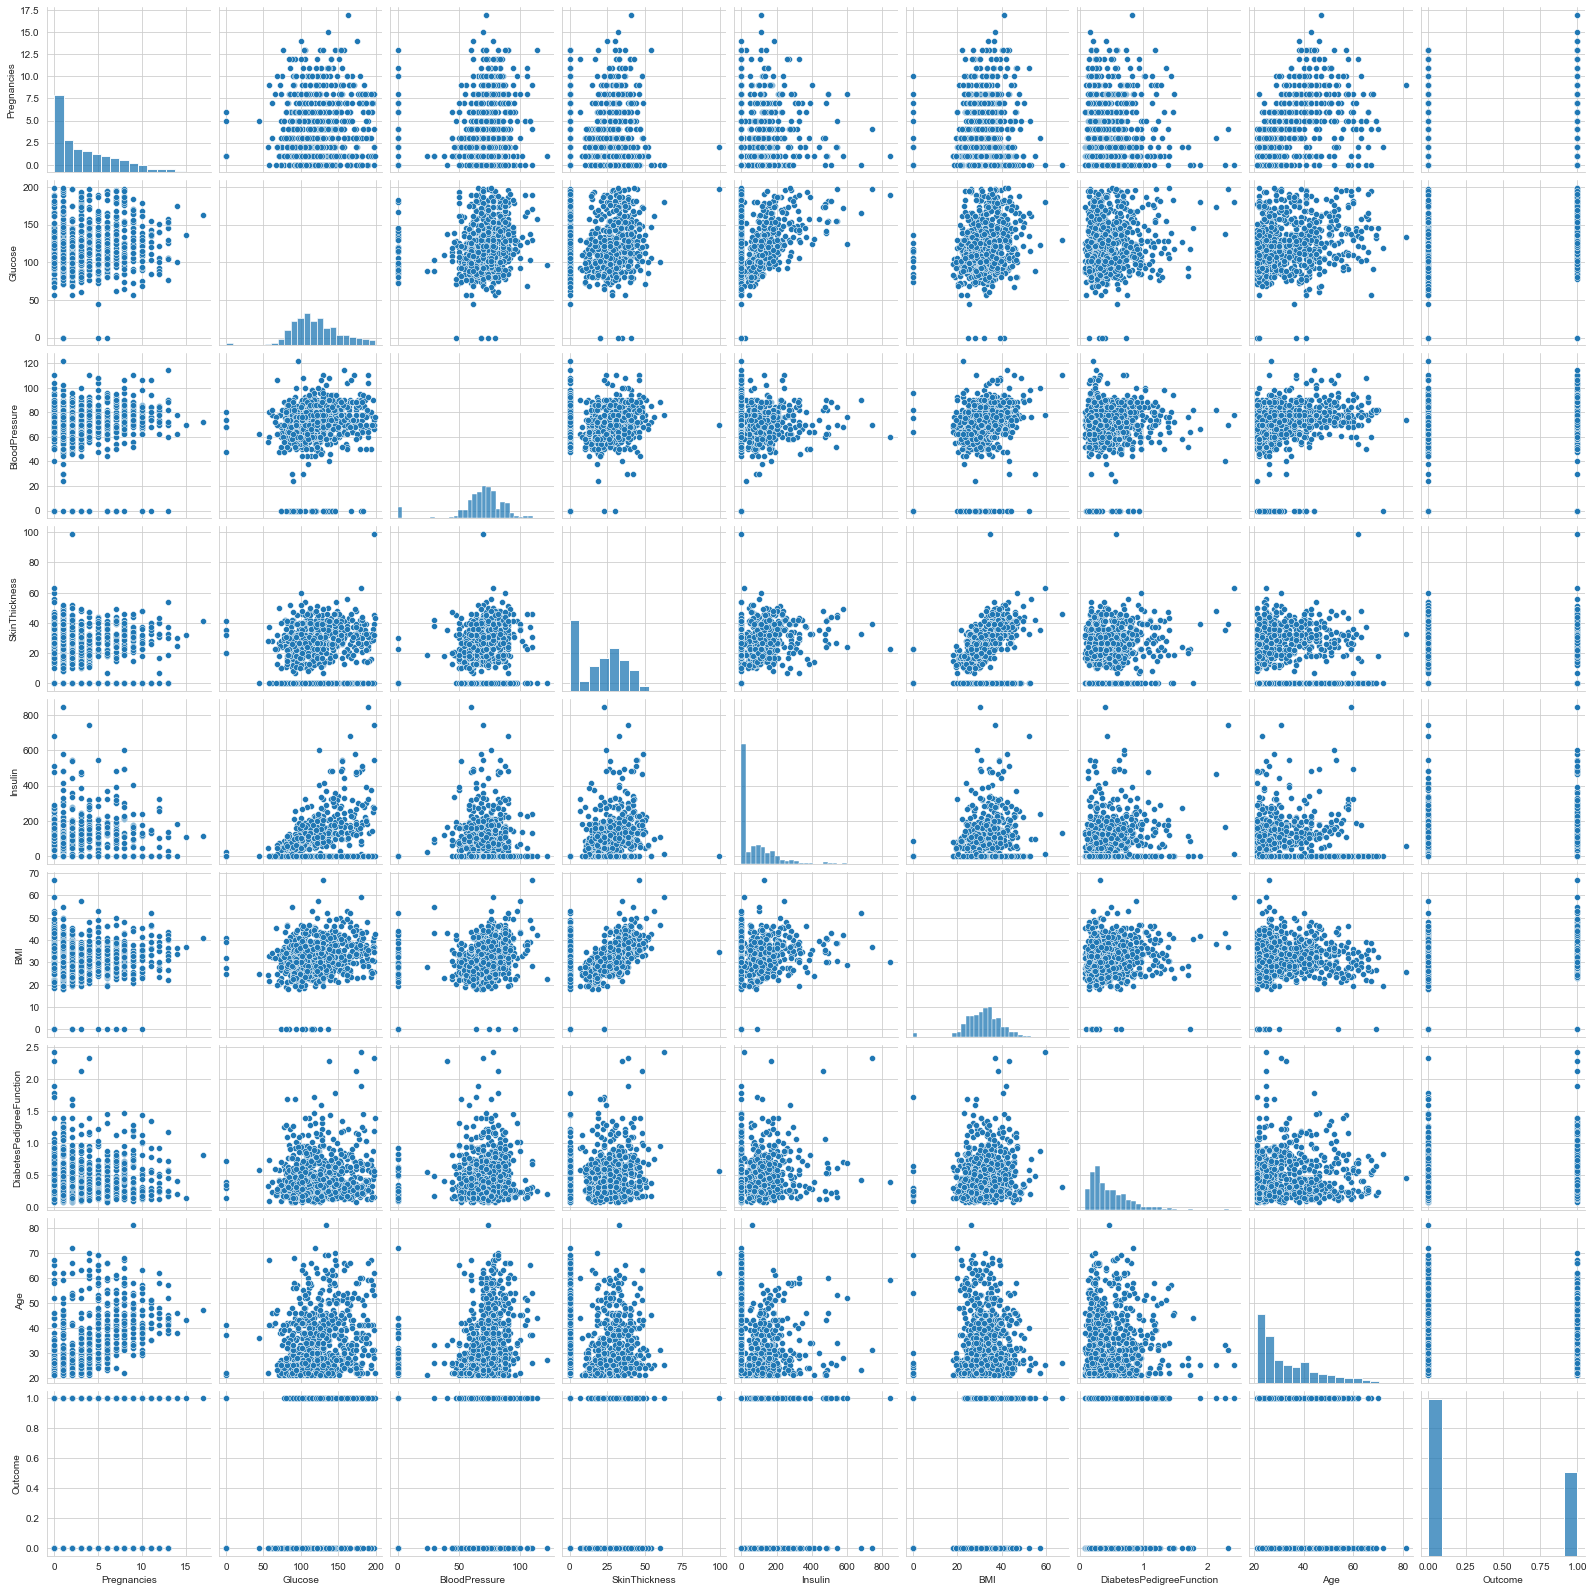

In [352]:
sns.pairplot(df) #gibt zur genrellen Übersicht die Bezüge zwischen den einzelnen Variablen wieder

<AxesSubplot:xlabel='BMI', ylabel='Count'>

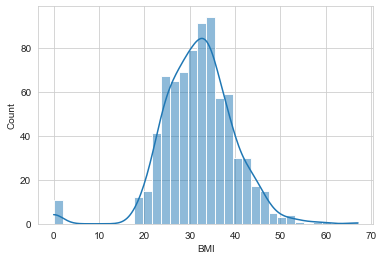

In [353]:
#Histogramm des BMI, auch hier nicht viele fehlenden Werte. Deshalb wird später auch drauf verzichtet, diese zu ersetzen.
sns.histplot(df['BMI'],kde=True) 


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

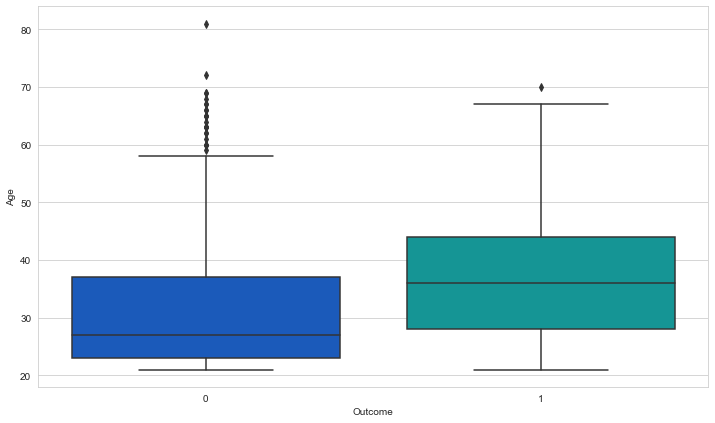

In [350]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Outcome',y='Age',data=df,palette='winter') #Boxplots sind auch einfach mit seaborn möglich

Mit seaborn kann zum Beispiel leicht die Korrelation zwischen den Features angezeigen lassen.

<AxesSubplot:>

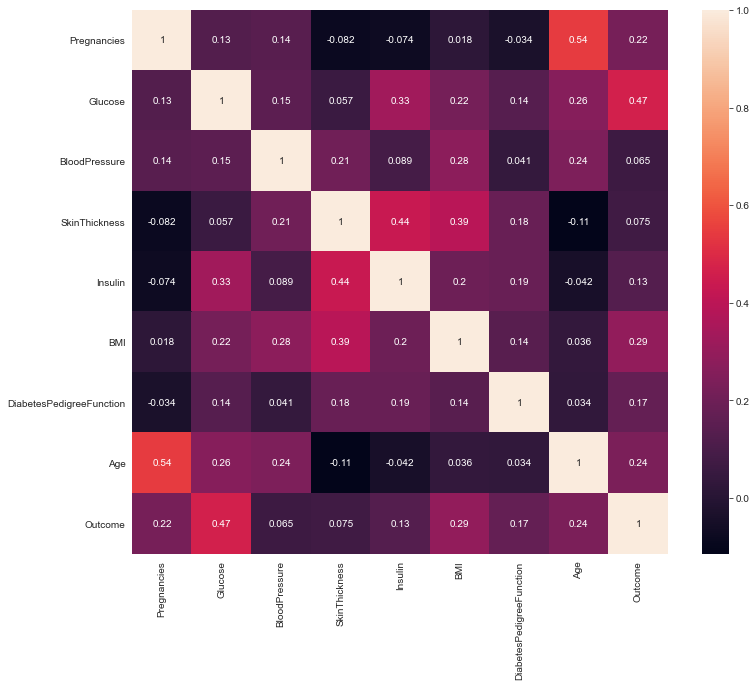

In [351]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)

Wie viele haben denn eigentlich Diabetis? 

<AxesSubplot:xlabel='Outcome', ylabel='count'>

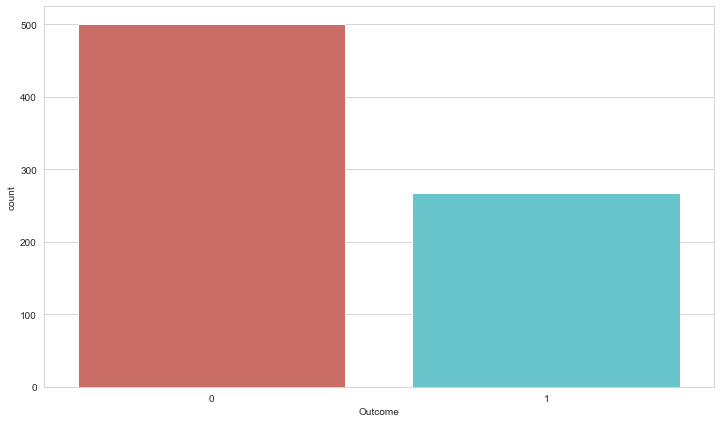

In [261]:
plt.figure(figsize=(12, 7))
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=df,palette='hls')

Manche Plots könnten auch irreführend sein, da beim nächsten zu beachten ist, dass 85.55% schon eine Schwangerschaft hatten

<AxesSubplot:xlabel='Outcome', ylabel='count'>

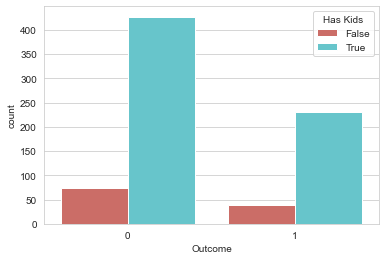

In [339]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',hue='Has Kids',data=df,palette='hls') #Hier wäre es auch denkbar in Altersgruppen zu unterteilen

#### Auch Zusammenhänge zweier Features können geplottet werden.

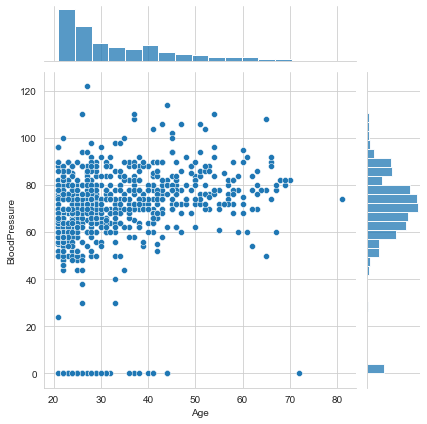

In [337]:
sns.jointplot(x='Age',y='BloodPressure',data=df)

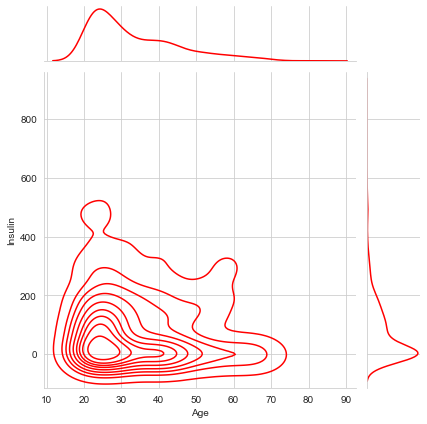

In [354]:
sns.jointplot(x='Age',y='Insulin',data=df,color='red',kind='kde');

## Ab jetzt werden die Daten bereinigt bzw. angepasst um alle Informationen zu nutzen und nachher auch den besten "fit" zu erhalten

Erstmal überprüfen, ob es fehlende Daten gibt. (In der Form NA bzw. NaN, Nullen werden hier nicht dargestellt). 

<AxesSubplot:>

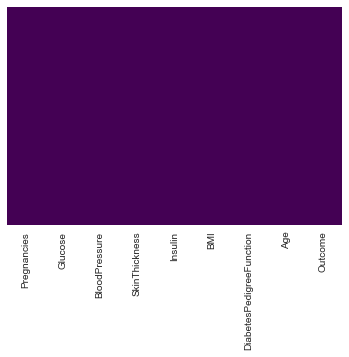

In [355]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #Keine fehlenden Daten, würden in einer Farbe klar erscheinen

Hier gibt es keine, deshalb ein kleines Bild wie es aussehen würde:
<img src=https://i.ibb.co/R4PTP60/missing-data.png>

Man könnte aus "Pregnancies" noch ein weiteres Feature hinzufügen,
indem man z.B. mit der Verteilung der (binären) Geschlechter schätzt, 
wenn es keine Schwangerschaft gab oder z.B. eine multivariate Verteilung 
benutzten um alle Informationen zu benutzen. Auch eine binäre Variable wie "Has Kids" wäre denkbar:

In [314]:
df['Has Kids'] = df['Pregnancies'].apply(lambda x:x>0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Has Kids
0,6,148,72,35,0,33.6,0.627,50,1,True
1,1,85,66,29,0,26.6,0.351,31,0,True
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,True
4,0,137,40,35,168,43.1,2.288,33,1,False


In [315]:
df['Has Kids'].apply(lambda x:x==True).value_counts()

True     657
False    111
Name: Has Kids, dtype: int64

Die meisten aus dem Datensatz haben Kinder, also werde ich es im weiteren so behalten und kein Feature hinzufügen. "Has Kids" wird später entfernt. Jetzt zum Feature der Hautdicke:

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

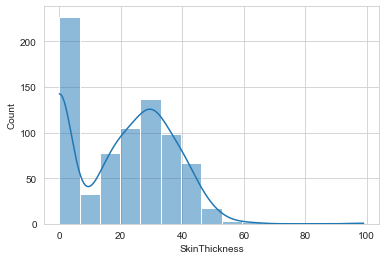

In [237]:
sns.histplot(df['SkinThickness'],kde=True) 

In [320]:
df['SkinThickness'].apply(lambda x:x==0).value_counts()

False    541
True     227
Name: SkinThickness, dtype: int64

Es fehlt relativ häufig die Hautdicke bei den Daten, also kann man das Histogramm plotten, welche die fehlenden Werte ignoriert. Scheinbar liegt eine Normalverteilung vor mit den unten gegebenen Werten.

count    541.000000
mean      32.774122
std        7.144264
min        0.000000
25%       27.800000
50%       32.800000
75%       36.900000
max       67.100000
Name: BMI, dtype: float64

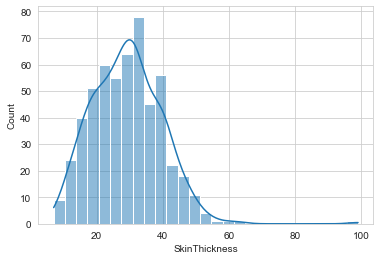

In [239]:
ed = df.drop(df[df['SkinThickness'] == 0].index)
sns.histplot(ed['SkinThickness'],kde=True)
ed['BMI'].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,30.091193,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,9.880639,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,23.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.910019,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


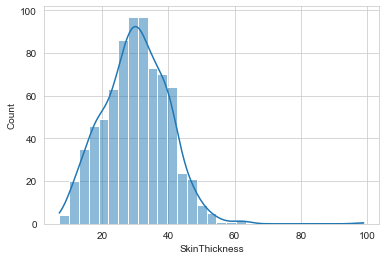

In [321]:
#Die fehlenden Daten werden mit zufälligen normalverteilten Werten ersetzt
df.loc[df['SkinThickness'] < 1, 'SkinThickness'] = np.random.normal(loc=32.774122,
                                                                    scale=7.144264, 
                                                                    size = 227) #227 ist die Anzahl der fehlenden Werte von oben
sns.histplot(df['SkinThickness'],kde=True)
df.describe()

Schon besser! Das gleiche noch für Insulin? Hier liegt eher keine Normalverteilung, also lassen wir es erstmal gut sein ;). Das gleiche könnte man auch mit dem Blutdruck durchführen.

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

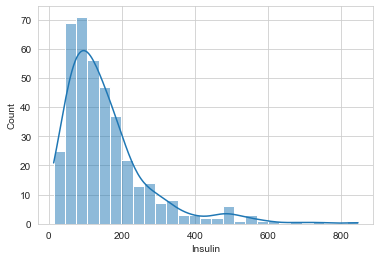

In [263]:
ed = df.drop(df[df['Insulin'] == 0].index)
sns.histplot(ed['Insulin'],kde=True)

In [266]:
df.drop(['Has Kids'],axis=1,inplace=True) #Feature wieder entfernen

## Kommen wir nun zum Machine Learning Teil mit der Logistischen Regression:
Die logistische Regression unterscheidet sich zur linearen Regression **nur** dadurch, dass die
lineare Funktion für die binäre Variable in eine logistische Funktion gepackt wird, um Werte aus der Menge [0,1] zu erhalten. Diese dienen dann als Wahrscheinlichkeiten.

In [171]:
from sklearn.model_selection import train_test_split

In [268]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1), 
                                                    df['Outcome'], test_size=0.30, 
                                                    random_state=101) #Daten teilen in "training set" und "test set"

In [269]:
from sklearn.linear_model import LogisticRegression

In [274]:
import warnings
warnings.filterwarnings('ignore') #wie da schon steht einfach ignorieren :)

In [271]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=100) #Modell definieren
logmodel.fit(X_train,y_train) #Modell fitten

LogisticRegression()

In [272]:
predictions = logmodel.predict(X_test) #Vorhersagen mit dem Modell treffen

In [276]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Um zu sehen wie gut die Vorhersagen waren, gibt es ein verschiedene Kennzahlen bzw. etwas mathematischer Metriken.
Precision und Recall sind wie folgt definiert:
- Precision = TP / (TP+FP)
- Recall = TP / (TP+FN)

Wobei TP für "true positive", FP für 'false positive' und FN für 'false negative' steht (vgl. Fehler 1. Art und 2. Art).
Die Werte in eine Matrix eingetragen gibt die sogenannte **Confusion Matrix**.


<img src=https://i.ibb.co/zsJgxQ1/confusion-matrix.png>

In [335]:
conf_mat = pd.DataFrame(confusion_matrix(y_test,predictions))
conf_mat.rename(index={0:'Positiv',1:'Negativ'}, columns={0:'Positiv',1:'Negativ'}, inplace=True)
conf_mat

,Positiv,Negativ
Positiv,134,16
Negativ,30,51


Außerdem gibt es noch die "Accuracy", welche einfach alle richtigen Treffer durch die Gesamtzahl teilt.
Der F1-Score ist ein harmonischer Mittelwert aus Recall und Precision, der extreme Werte mehr bestraft. Umso näher der Wert an 1 liegt, desto besser!

In [279]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       150
           1       0.76      0.63      0.69        81

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.80      0.80      0.80       231



## Jetzt zum Erstellen synthetischer Daten mit der Hilfe von Copulas. 
Erstmal eine schöne Funktion von dem copulas package: die 3D Plots.

<Axes3DSubplot:>

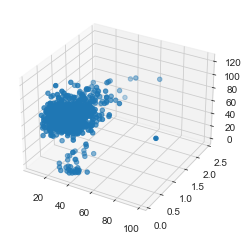

In [290]:
from copulas.visualization import scatter_3d

scatter_3d(df[['SkinThickness', 'DiabetesPedigreeFunction', 'BloodPressure']]) 


Für die erste Copula wird angenommen, dass alle Werte Normalverteilt sind. Also wird die Gauss'sche Copula dafür ausgewählt.

In [291]:
from copulas.multivariate import GaussianMultivariate
dist = GaussianMultivariate()
dist.fit(df)

In [283]:
sample = dist.sample(len(df)) #Stichprobe erstellen, welche vergleichbar ist in der Größe zur ursprünglichen

Kurzer Überblick wie am Anfang, man erkennt, dass "Outcome" der Ergebnisse einer Logistischen Funktion enspricht, was noch angepasst werden muss.

In [285]:
sample.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.806445,121.686601,70.419679,29.943147,85.751098,32.313311,0.476466,34.822349,0.360560
std,3.491145,33.247760,18.457710,9.554537,115.475171,8.088469,0.302834,12.349005,0.490915
min,-1.791038,-7.459754,-10.749680,2.599400,-383.879492,-1.107110,0.080252,21.000127,-0.394854
25%,1.085566,97.657306,63.248582,23.390195,10.054469,26.769129,0.247526,24.609948,-0.028369
50%,2.860506,118.345485,71.789253,30.222734,85.622526,32.519944,0.411847,31.164125,0.107307
75%,5.931970,142.429496,81.241579,36.567809,163.657587,37.558392,0.631611,42.063378,0.939334
max,15.824630,212.261549,113.709077,64.071767,498.078886,69.054935,2.269766,79.464110,1.360559


<AxesSubplot:xlabel='Outcome', ylabel='Count'>

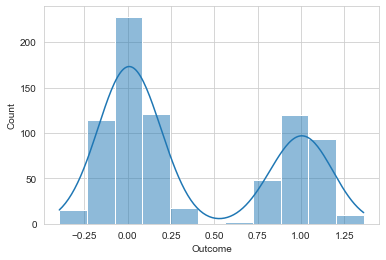

In [286]:
sns.histplot(sample['Outcome'], kde=True)

Nun wird das 'Outcome' angepasst, indem Werte größer als 0.5 in '1' geändert werden, sowie der Rest in '0'. Dann wird
das ursprüngliche 'Outcome' gelöscht, sonst würde der Algorithmus den Zusammenhang zwischen der Modifikation und dem Original
erkennen und hätte dann natürlich eine Genauigkeit von 100%. 
Man erkennt oben auch noch, dass die Schwangerschaftswerte keinen Sinn machen, also werden die Werte gerundet. 
Der BMI ist teilweise negativ, da er nicht normalverteilt ist. Man könnte natürlich jetzt noch eigene Anpassungen machen oder direkt, wie später beschrieben, die Verteilungen für jede Spalte selbst auswählen.

In [287]:
sample['OutcomeMod'] = sample['Outcome'].apply(lambda x:x>0.5) #gibt 'True' wieder, wenn der Wert größer als 0.5 ist
sample["OutcomeMod"] = sample["OutcomeMod"].astype(int) #ändert das ganze in 0 oder 1
sample.drop('Outcome', axis=1, inplace=True) 
sample['Pregnancies'] = sample['Pregnancies'].apply(round) 
sample.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,OutcomeMod
0,5,97.381075,92.047594,36.525797,126.949925,32.826468,1.571493,41.835853,0
1,7,156.015640,72.394549,32.570595,42.783215,34.214920,0.578170,37.589352,0
2,10,171.594310,87.807222,30.634780,-81.870208,31.727287,0.859075,67.896064,1
3,4,177.024873,23.772852,23.441513,-100.780633,24.706926,0.393559,36.879937,1
4,6,108.042210,92.911948,29.157176,74.187399,39.040367,0.724072,54.526568,0


Hier ein Vergleich zu den echten Daten bzgl. Hautdicke, Diabetis Pedigree Funktion und Blutdruck. Die Abweichungen scheinen garnicht mal so groß zu sein, trotz negativen BMI!

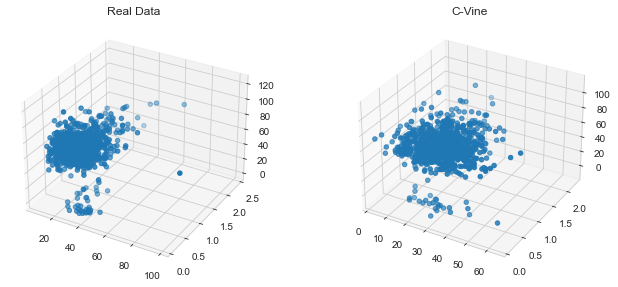

In [293]:
from copulas.visualization import side_by_side
side_by_side(scatter_3d, {'Real Data': df[['SkinThickness', 'DiabetesPedigreeFunction', 'BloodPressure']], 
                          'C-Vine': sample[['SkinThickness', 'DiabetesPedigreeFunction', 'BloodPressure']]})


Jetzt die logistische Regression, wenn alles mit einer Gauss'schen Copula wie oben simuliert wird.

In [186]:
X_train_gauss, X_test_gauss, y_train_gauss, y_test_gauss = train_test_split(sample.drop('OutcomeMod',axis=1), 
                                                    sample['OutcomeMod'], test_size=0.30, 
                                                    random_state=101)

In [187]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=100)
logmodel.fit(X_train_gauss,y_train_gauss)

LogisticRegression()

In [188]:
predictions_gaussgauss = logmodel.predict(X_test_gauss)

In [189]:
print(classification_report(y_test_gauss,predictions_gaussgauss)) 

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       155
           1       0.70      0.46      0.56        76

    accuracy                           0.76       231
   macro avg       0.74      0.68      0.69       231
weighted avg       0.75      0.76      0.74       231



Gerade wurden die synthetischen Daten nochmal in 'Train' und 'Test' unterteilt, um die Daten jedoch wirklich im Bezug zum ursprünglichen Datensatz zu vergleichen, muss die Testmenge natürlich auch dieser ursprüngliche Datensatz sein. Es ist zu beachten, dass jetzt die beiden Mengen doppelt so viele Daten besitzen, da keine Aufteilung mit 'train_test_split' erfolgt.

In [190]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=100)
logmodel.fit(sample.drop('OutcomeMod',axis=1),sample['OutcomeMod'])
predictions_gauss = logmodel.predict(df.drop('Outcome',axis=1))
print(classification_report(df['Outcome'],predictions_gauss))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       500
           1       0.75      0.43      0.55       268

    accuracy                           0.75       768
   macro avg       0.75      0.68      0.69       768
weighted avg       0.75      0.75      0.73       768



Das Ganze kann man natürlich auch mit anderen Copulas machen. Das package was hier benutzt wird,
ist in der Lage für jede Variable eine eigene Verteilung zu wählen. Man könnte z.B. die Verteilung jedes Features 
statistisch bestimmen (z.B. kann man die mittlere quadratische Abweichung als "Fit-Funktion" benutzen vgl. [hier](https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1)) und dann die einzelnen Verteilungen den Spalten zuweisen in der Form
```
dist = GaussianMultivariate(distribution={
    "Feature1": BetaUnivariate,
    "Feature2": GaussianKDE,
    "Feature3": GaussianUnivariate,
    ...
})
```


Die sogenannte Vine Copula versucht die Zusammenhänge paarweise zu simulieren und dann mit geschachtelten 
Bäumen (vgl. Graphentheorie und [hier](https://www.groups.ma.tum.de/fileadmin/w00ccg/statistics/veranstaltungen/Vines.pdf)) die multivariate Verteilung zu schätzen. 

In [295]:
from copulas.multivariate import VineCopula

center = VineCopula('center') #die sogenannte C-Vine Copula
#regular = VineCopula('regular') weitere Vine Copulas
#direct = VineCopula('direct')

center.fit(df)
#regular.fit(df) 
#direct.fit(df)

center_samples = center.sample(1000)
#regular_samples = regular.sample(1000) 
#direct_samples = direct.sample(1000)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9.156200,158.053685,84.796598,38.267727,149.357007,37.908574,0.608132,37.279640,0.121678
1,6.285289,77.496110,63.260391,22.843809,22.110795,29.953228,0.359071,29.518250,1.041586
2,0.457755,96.276290,8.178534,16.630596,-31.861440,21.959161,0.375319,19.748873,-0.119134
3,0.815393,99.128747,89.870224,19.107985,-33.469311,21.763201,0.180869,21.567588,-0.094728
4,0.188237,80.589513,40.336000,14.125356,-33.454525,21.762375,0.176925,41.186289,-0.023515


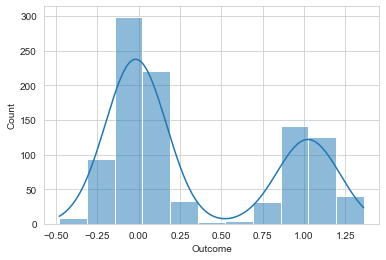

In [296]:
sns.histplot(center_samples['Outcome'], kde=True)
center_samples.head() #nachschauen, wie die C-Vine mit binären und ganzzahligen Variablen umgeht

In [297]:
#Wieder die gleiche Anpassung der Daten
center_samples['OutcomeMod'] = center_samples['Outcome'].apply(lambda x:x>0.5)
center_samples["OutcomeMod"] = center_samples["OutcomeMod"].astype(int)
center_samples['Pregnancies'] = center_samples['Pregnancies'].apply(round)
center_samples.drop('Outcome', axis=1, inplace=True)

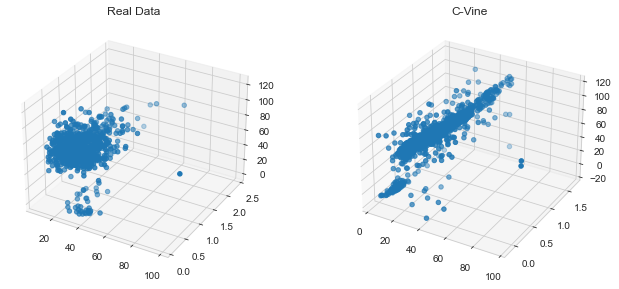

In [298]:
side_by_side(scatter_3d, {'Real Data': df[['SkinThickness', 'DiabetesPedigreeFunction', 'BloodPressure']], 'C-Vine': center_samples[['SkinThickness', 'DiabetesPedigreeFunction', 'BloodPressure']]})

Hier scheint das Sample nicht so gut zu sein, aber das werden später die Scores im Vergleich zeigen.

In [299]:
#Logistische Regression
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(center_samples.drop('OutcomeMod',axis=1), 
                                                    center_samples['OutcomeMod'], test_size=0.30, 
                                                    random_state=101)

In [300]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=100)
logmodel.fit(X_train_c,y_train_c)
predictions_cc = logmodel.predict(X_test_c)
print(classification_report(y_test_c,predictions_cc)) #erkennt anscheinend die normalverteilungen

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       199
           1       0.83      0.69      0.76       101

    accuracy                           0.85       300
   macro avg       0.84      0.81      0.82       300
weighted avg       0.85      0.85      0.85       300



In [301]:
#mit echten Daten als Testmenge
logmodel = LogisticRegression(solver='lbfgs', max_iter=100)
logmodel.fit(center_samples.drop('OutcomeMod',axis=1),center_samples['OutcomeMod'])
predictions_c = logmodel.predict(df.drop('Outcome',axis=1))
print(classification_report(df['Outcome'],predictions_c)) 

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       500
           1       0.55      0.47      0.51       268

    accuracy                           0.68       768
   macro avg       0.64      0.63      0.64       768
weighted avg       0.67      0.68      0.67       768



#### Hier nochmal den Vergleich aller Scores:
1. Mit den ursprünglichen Daten
2. Mit Daten der Gauss'schen Copula und den echten Daten als Testmenge
3. Mit Daten der C-Vine Copula und den echten Daten als Testmenge

In [220]:
print(classification_report(y_test,predictions))
print(classification_report(df['Outcome'],predictions_gauss))
print(classification_report(df['Outcome'],predictions_c)) 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       150
           1       0.76      0.63      0.69        81

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.80      0.80      0.80       231

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       500
           1       0.75      0.43      0.55       268

    accuracy                           0.75       768
   macro avg       0.75      0.68      0.69       768
weighted avg       0.75      0.75      0.73       768

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       500
           1       0.53      0.46      0.49       268

    accuracy                           0.67       768
   macro avg       0.63      0.62      0.62       768
weighted avg       0.66      0.67      0.66       768



Der F1-Score ist bei den ursprünglichen Daten am besten, trotz der kleineren Datenmenge. Die Annahme, dass alle Features Normalverteilt liefert hier einen besseren Score für die synthetischen Daten. Es könnte durchaus mit der Zuweisung selbst ausgewählter Verteilungen, wie oben beschrieben, ein besserer Score erreicht werden. Aber es ist auch zu erkennen, dass die Gauss'sche Copula garnicht mal so schlechte Ergebnisse für diesen Datensatz liefert. 